<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/DL_classification_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Introduction
**Purpose:**  
* Deep Learning algorithm으로 diabetes dataset에 대한 classification

**Framework**  
* PyTorch: Version `2.3.1+cu121`

**Dependencies**  
* Python: Version `3.10.12`
* Numpy: Version `1.25.2`
* Pandas: Version `2.0.3`
* scikit-learn: Version `1.3.2`
    

## 0. 1. Load the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for hitmap drawing
from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow import keras

In [ ]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
'''
| Pregnancies               | 임신 횟수
| Glucose                   | 글루코스
| BloodPressure             | 혈압
| SkinThickness             | 삼두근 부위 피부 두께
| Insulin                   | 인슐린 수치
| BMI                       | BMI 수치
| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수
| Age                       | 나이
| Outcome                   | 유전병 유무(0, 1)
'''

'\n| Pregnancies               | 임신 횟수\n| Glucose                   | 글루코스\n| BloodPressure             | 혈압\n| SkinThickness             | 삼두근 부위 피부 두께\n| Insulin                   | 인슐린 수치\n| BMI                       | BMI 수치\n| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수\n| Age                       | 나이\n| Outcome                   | 유전병 유무(0, 1)\n'

Text(0.5, 1.0, 'label')

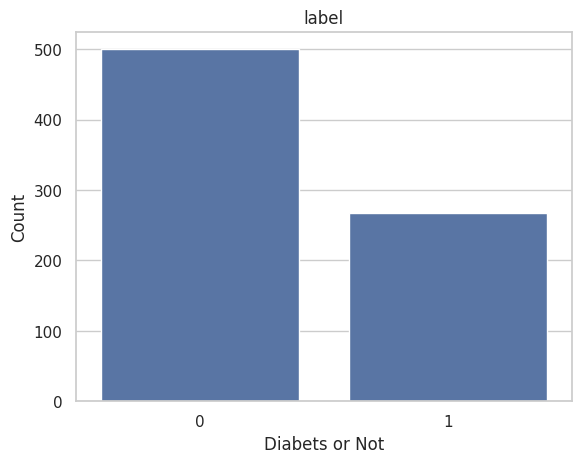

In [ ]:
# label count 확인 by graph
sns.countplot(data=diabetes, x='Outcome')
plt.xlabel('Diabets or Not')
plt.ylabel('Count')
plt.title('label')

In [ ]:
# label count 확인 by numeric
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
# missing value 확인
# .info()는 non-missing value의 수를 제공한다
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# if missing value is exist, drop it(제거말고 median 대체 등도 가능함)
# diabetes = diabetes.dropna()

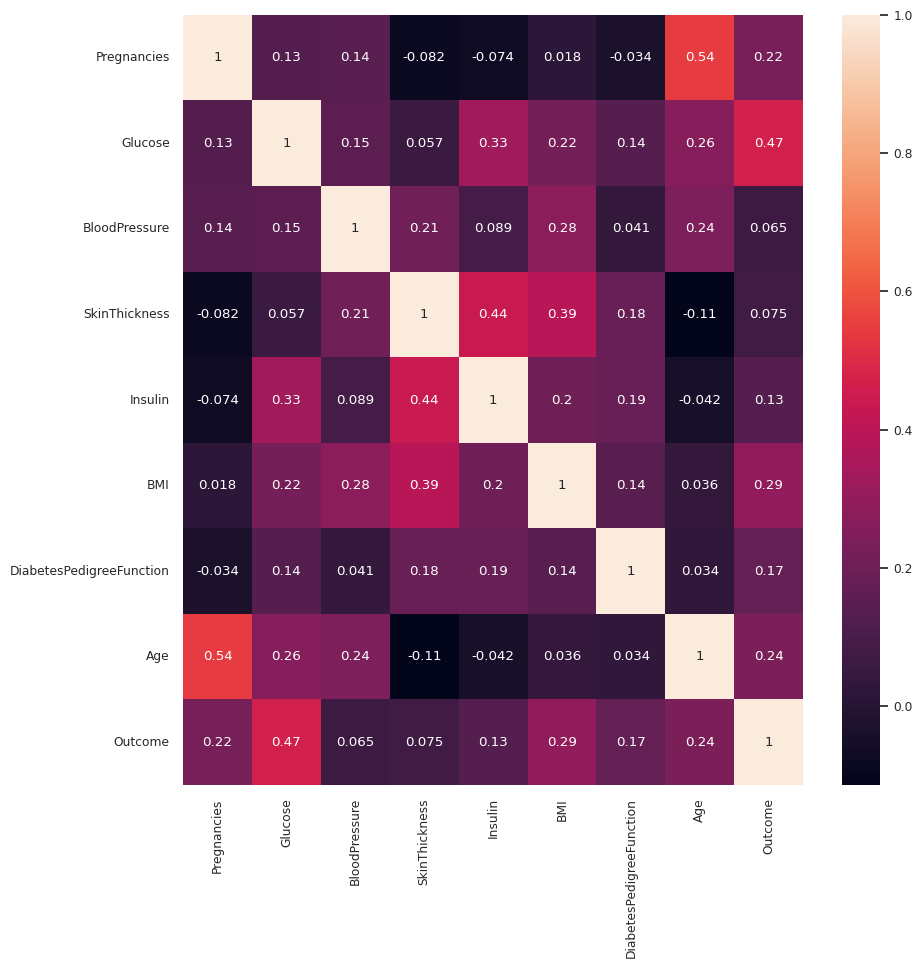

In [ ]:
# correlation SOLUTION 1.
# numerical하게 파악 가능함, missing value는 파악 불가

# if corr >= 0.3, correlated and if corr >= 0.7, high correlated
diabetes_corr = diabetes.corr()

# hitmap ploting by Seaborn library
# The 'annot' parameter is used to add annotations to the cells of a heatmap.
# The 'cbar' parameter controls the display of the color bar(position=right) in plots like heatmaps.
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(diabetes_corr, annot=True, cbar=True)
plt.show()

# the label(BMI) is correlated with SkinThickness

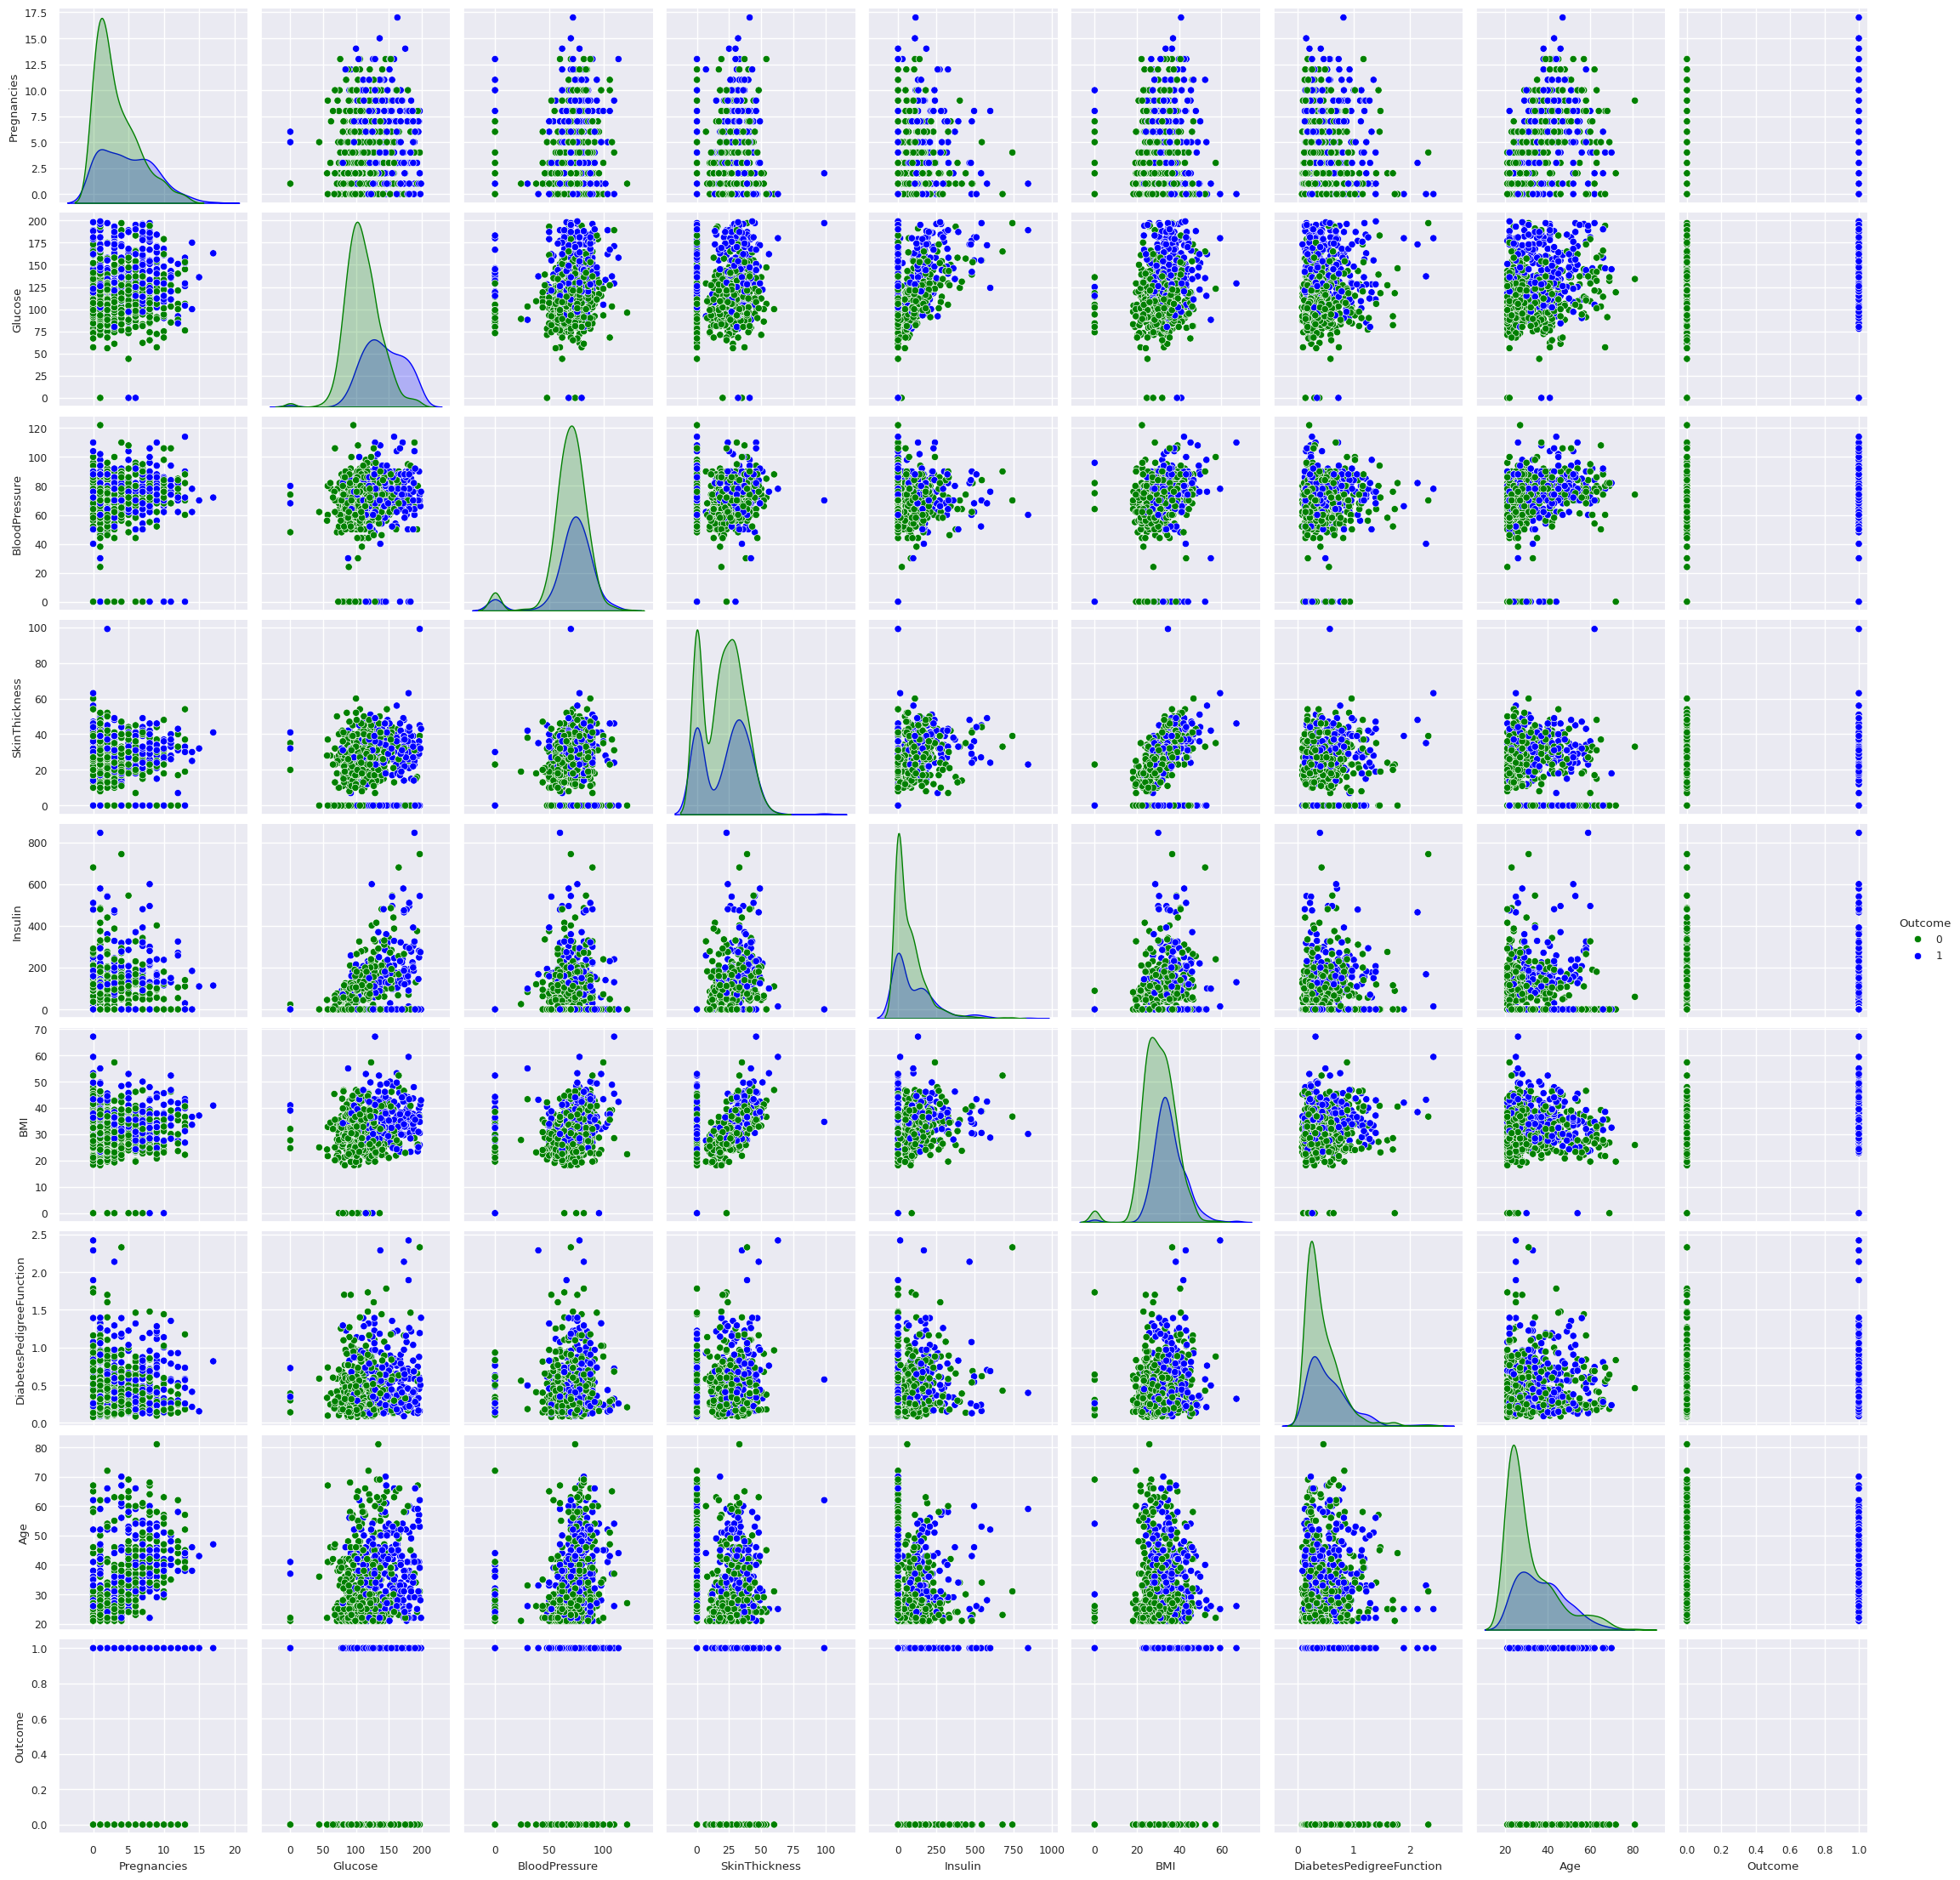

In [ ]:
# correlation SOLUTION 2.
# scatter plot 또는 others로 확인 가능, missing value도 확인 가능
sns.pairplot(diabetes,
             vars=['Pregnancies', 'Glucose', 'BloodPressure',
                   'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
                   'Age', 'Outcome'],
             hue='Outcome', # 'Outcome'의 value에 따라 구분하여 plotting
             palette = {0: 'green', 1: 'blue'}) # hue에서의 색상 구분 지정
plt.show()

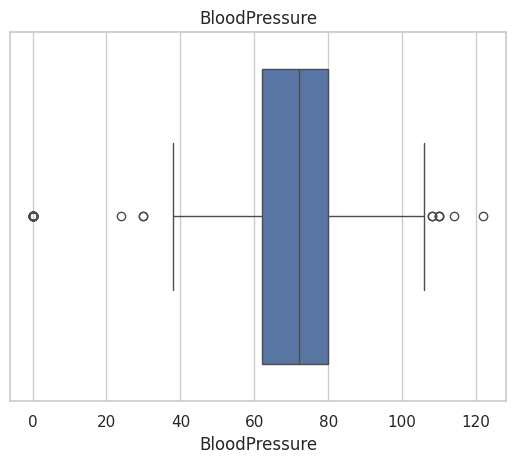

In [ ]:
# 특정 column의 range 확인 및 outliar 확인
sns.set_theme(style='whitegrid')
sns.boxplot(x='BloodPressure', data=diabetes)
plt.title('BloodPressure')
plt.show()

<ipython-input-84-21ec76e5d4b5>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  diabetes.hist(ax=ax)


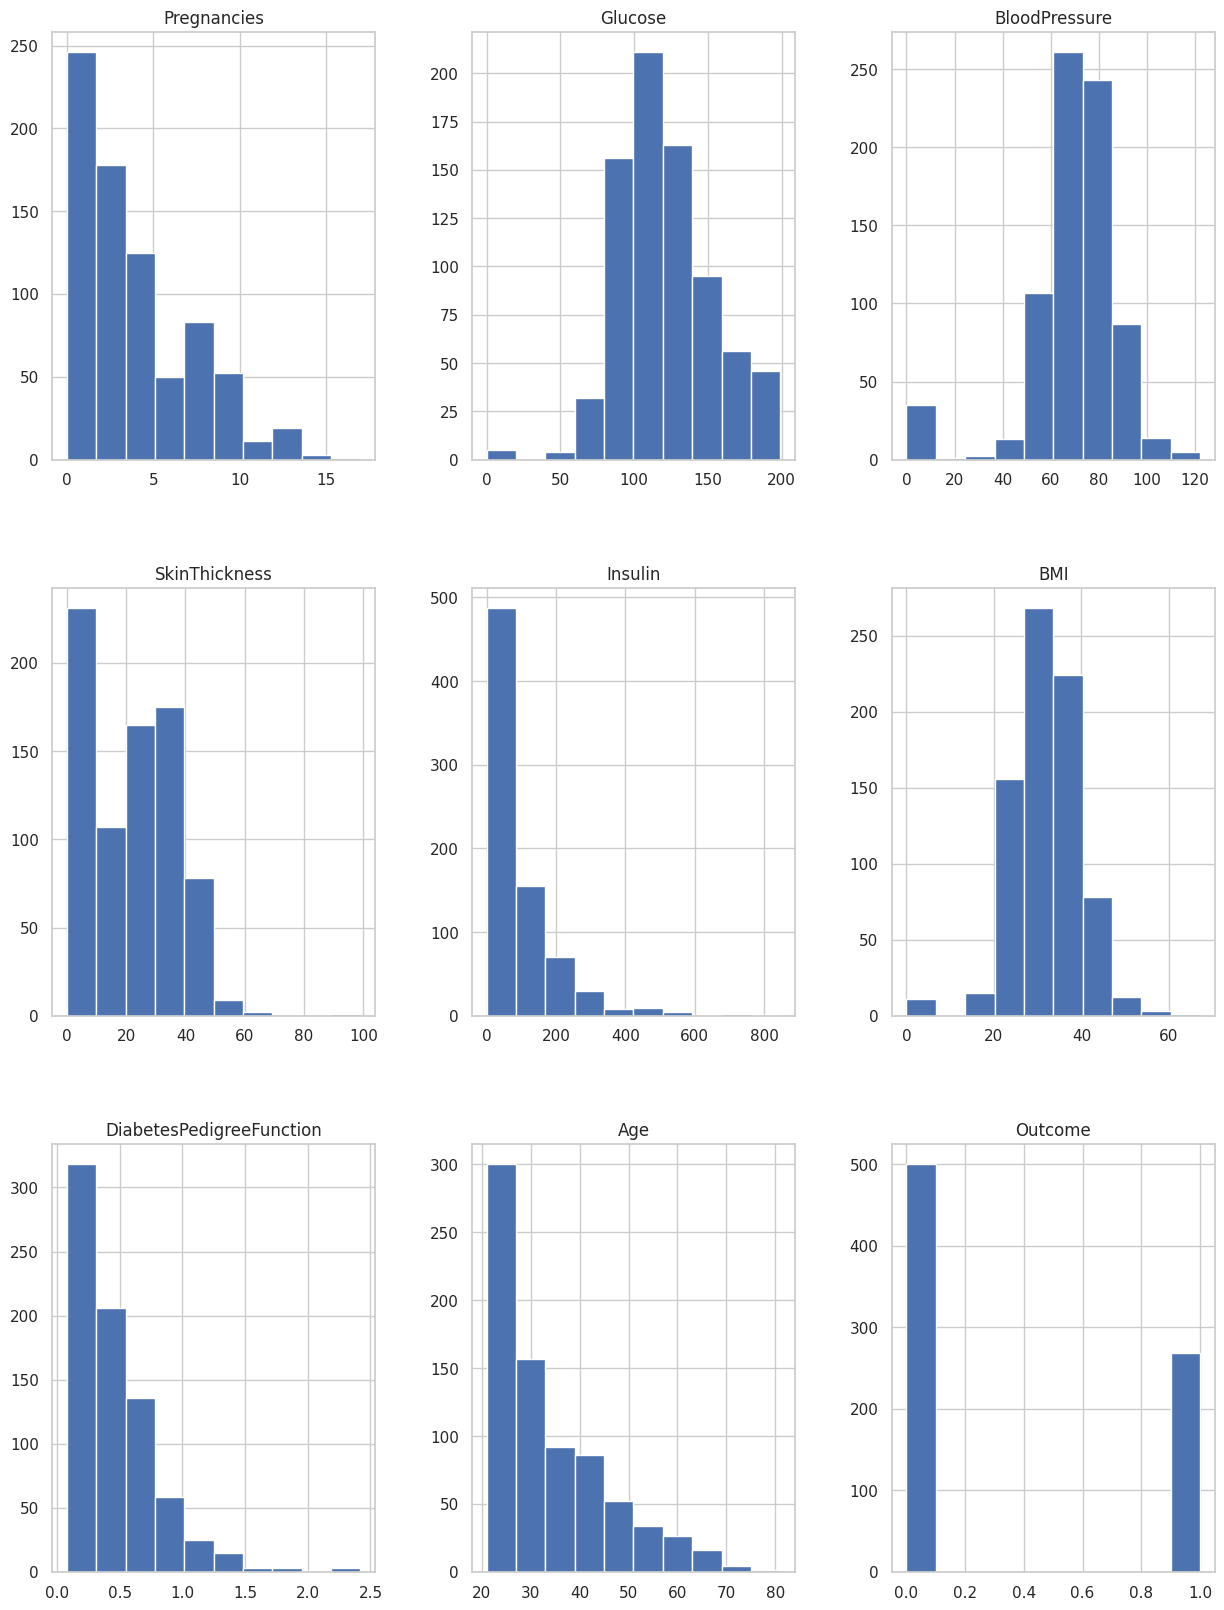

In [ ]:
# 각 column별 histogram 확인
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
diabetes.hist(ax=ax)
plt.show()

# 1. Deep Learning Introduction
**types of loss function**  
* Binary Crossentropy Error(for binary classification)
* Categorical Crossentropy Error(for multi-class classification)
* Mean Squared Error(for regression)

**types of activation function**
* Sigmoid(curved line)
* Softmax(curved line)
* Hyperbolic Tangent
* ReLU(bent)
* Leaky ReLU

# 2. PyTorch

## 2. 1. Load dataset and convert to `torch.tensor`

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn # neural network
import torch.optim as optim # optimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X = df.drop('Outcome', axis=1).to_numpy()
y = df['Outcome'].to_numpy()

In [ ]:
print(X)
print(y[:20])

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1]


In [ ]:
print(X.shape, y.shape)

(768, 8) (768,)


## 2. 2 Split dataset into train set and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)
print(X_train.shape, X_test.shape)
# split에서 stratify가 잘 적용되었는지 확인 [count_0, count_1]을 리턴
print(np.bincount(y_train), np.bincount(y_test))

(614, 8) (154, 8)
[400 214] [100  54]


## 2. 3. Standardization

In [ ]:
# Z-score Normalization(= Standardization)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:3])
print(X_test[:3])

[[-0.85135507 -0.98013068 -0.40478372 -0.55397256 -0.33131928 -0.60767846
   0.31079384 -0.79216928]
 [ 0.35657564  0.16144422  0.46536842  0.392787   -0.52639809 -0.30213902
  -0.11643851  0.56103382]
 [-0.5493724  -0.50447447 -0.62232176  1.21331196  0.14244354  0.3725939
  -0.76486207 -0.70759409]]
[[ 0.96054099  1.20788789 -0.29601471 -1.31138021 -0.73076636 -0.58221684
  -0.55579092  0.56103382]
 [ 1.86648903 -1.67775979  1.98813468  0.14031779 -0.27558248  0.44897876
  -0.58306107  1.15306018]
 [-0.5493724   0.03460257  0.3565994   0.392787    1.12712704  0.499902
   0.01688223 -0.6230189 ]]


## 2. 4. Convert Numpy `ndarray` to PyTorch `tensor`

In [ ]:
# loss function 연산을 위해서 dtype을 모두 float32로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# binary classify의 경우, label(y)을 2-dim으로 해야 연산 오류 방지
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

print(y_train_tensor[:5])

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])


In [ ]:
# Define the Multi-layer perceptron model
class DiabetesModel(nn.Module):
    def __init__(self):
        super(DiabetesModel, self).__init__()
        self.layer1 = nn.Linear(8, 16) # 8 = features 수 = input node 수
        # 16과 12는 multi-layer perceptron에서 자주 사용하는 hidden layer의 unit 수임
        # hyper parameter tuning 가능
        self.layer2 = nn.Linear(16, 12)
        self.layer3 = nn.Linear(12, 1) # 1 = ouput node 수
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    # nn.Module Class를 부모로 하는데, nn.Module은 model(X_train_tensor)과 같이 하면,
    # 자동으로 forward function을 호출함. 여기서 overriding한 것
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))

        return x

model = DiabetesModel()

In [ ]:
'''
(위 cell, line14)
layer1(x)는 초기 input x에 대해서 weight와 bias를 이용하여 연산하여 출력함
이 출력값을 ReLU에 전달해서 연산하고, 이를 새로운 x로 정의함
(위 cell, line15)
새로운 x는 layer2의 입력값이 됨 (layer2(x))
layer 2의 linear function에 의해서 또 연산 후 출력되고, 다시 ReLU에 전달하여 연산
(위 cell, line16)
ReLU 연산 값을 Sigmoid function에 넣고 그 출력 값을 output layer에 전달

model은 data instance x^i에 대하여 최종 출력값인 output node의 출력값이
0.5를 초과하면 positive, 그렇지 않으면 negative class라고 predict함
'''

In [ ]:
# Define the loss_function and optimization_function
criterion = nn.BCELoss() # Binary Cross Entropy LossFunction
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam, learning_rate=0.001

In [ ]:
# training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train() # 매 epoch마다 train(fit과 동일 개념)
    optimizer.zero_grad() # gradient를 초기화
    outputs = model(X_train_tensor) # 자동으로 forward call함
    # loss function 값으로 backpropagation
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    # backpropagation으로 계산된 gradient를 근거로 paramter(weight, bias)를 업데이트
    optimizer.step()

    # epoch를 10회 수행할 때마다 Loss 출력
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.6917
Epoch [20/100], Loss: 0.6811
Epoch [30/100], Loss: 0.6706
Epoch [40/100], Loss: 0.6588
Epoch [50/100], Loss: 0.6450
Epoch [60/100], Loss: 0.6287
Epoch [70/100], Loss: 0.6097
Epoch [80/100], Loss: 0.5887
Epoch [90/100], Loss: 0.5663
Epoch [100/100], Loss: 0.5434


In [ ]:
# evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor) # 이거 자체는 sigmoid 출력값 0 ~ 1
    # 이를 round시키면 결국 classify와 동일한 메커니즘임(다음 cell 참고)
    y_pred_class = y_pred.round()

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_tensor, y_pred_class))
# row = actual class, column = predicted class
print(confusion_matrix(y_test_tensor, y_pred_class))
print('[[TN FP]')
print(' [FN TP]]')

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       100
         1.0       0.59      0.61      0.60        54

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154

[[77 23]
 [21 33]]
[[TN FP]
 [FN TP]]


In [ ]:
print(y_pred[:3])
print(y_pred[:3].round()) # broadcasting

tensor([[0.5055],
        [0.3951],
        [0.4730]])
tensor([[1.],
        [0.],
        [0.]])


In [ ]:
'''
precision   | TP / (TP + FP)
recall      | TP / (TP + FN)
f1-score    | harmonic mean of precision and recall
              (2 * (precision * recall)) / (precision + recall)
support     | 각 class의 sample count
accuracy    | (TP + TN) / (TP + TN + FP + FN)
macro avg   | arithmatic mean of precision(각 class들의 precision 평균)
'''

In [ ]:
'''
TN  | True Negative(진음성)
FN  | False Negative(위음성)
FP  | False Positive(위양성)
TP  | True Positive(진양성)
'''